In [1]:
# Example showing how to apply B0 distortions for augmentation. For testing and selecting
# appropriate settings, 'modulate' should be set to False, which will result in sampling the
# distortion field with the maximum SD (instead of uniformly sampling the SD). Likewise, the
# bounds of the blurring-SD interval, 'min_blur' and 'max_blur' may be set to the same value.

In [2]:
import numpy as np
import nibabel as nib
import tensorflow as tf
import neurite as ne
import voxelmorph as vxm
import voxelmorph_sandbox as vxms

Issue loading cv2


In [3]:
# Load image.
path = '/autofs/cluster/fssubjects/test/mu40-crazy/data/affine/ref.nii.gz'
im = np.asarray(nib.load(path).dataobj)
im = im[im.shape[0] // 2, ...]

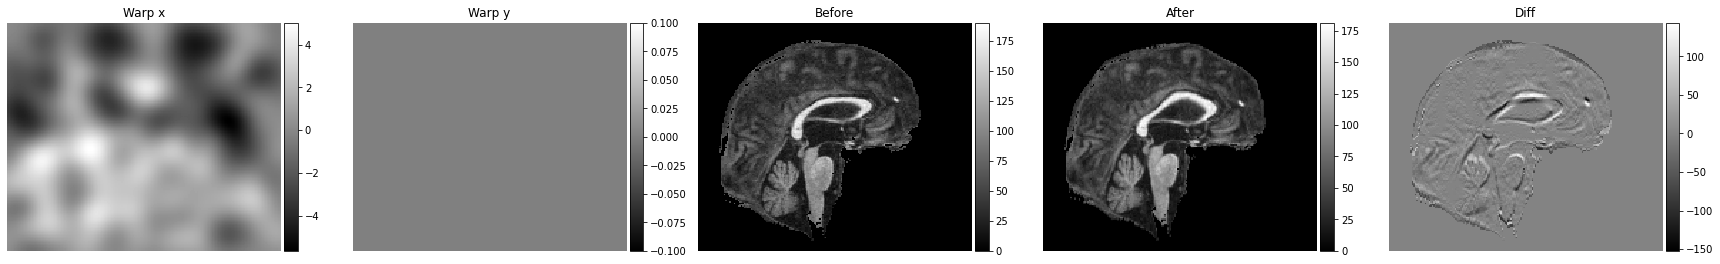

In [4]:
# Draw distortion.
test_dir = (1, 0) # Use None for randomization.
test_blur = 10
warp = vxms.utils.augment.draw_b0_distortion(
    im.shape,
    read_dir=test_dir,
    max_std=2,
    min_blur=test_blur,
    max_blur=test_blur,
    modulate=False,
)

# Apply to image.
inp = tf.constant(im, tf.float32)
inp = tf.expand_dims(inp, axis=-1)
out = vxm.utils.transform(inp, warp)
diff = out - inp

# Plot.
titles = ['Warp x', 'Warp y', 'Before', 'After', 'Diff']
slices = [warp[..., 0], warp[..., 1], inp, out, diff]
slices = [np.squeeze(x) for x in slices]
_ = ne.plot.slices(slices, width=24, do_colorbars=True, cmaps=['gray'], titles=titles)